In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns

# Plot data-points with matplotlib

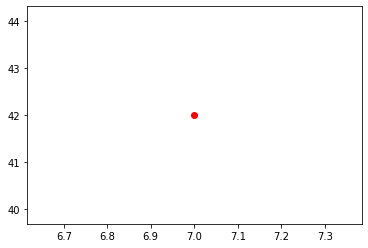

In [2]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
x = [7]
y = [42]
plt.plot(x , y , color = 'red', marker = "o")

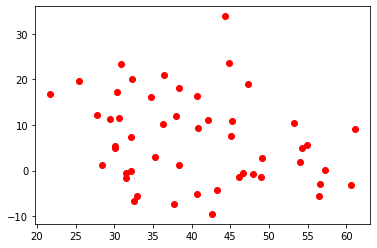

In [3]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(50, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
plt.scatter(datapoints[1, :],datapoints[0, :], marker = "o", color = 'red')
# We need to use the function scatter instead of the function plot

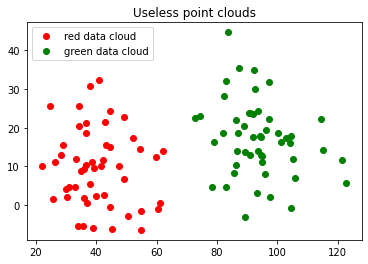

In [4]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]


# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
# plot data cloud2 with green triangles
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"

# Since they have the same distributio, I'll just assign the labels randomly


# title of the plot should be "useless point clouds"
# We create the figure
fig, ax  = plt.subplots()
ax.plot(datacloud1[1, :],datacloud1[0, :], marker = "o", color = 'red', linestyle = '', label = 'red data cloud')
plt.plot(datacloud2[1, :],datacloud2[0, :], marker = "o", color = 'green', linestyle = '', label = 'green data cloud')
plt.title('Useless point clouds')
# For the legend to appear we need to add the following command at the end 
ax.legend()

# Plot curves with matplotlib

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


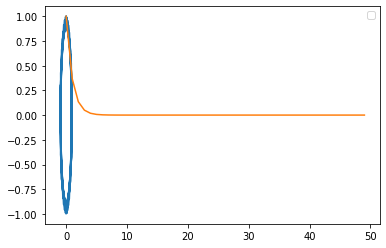

In [5]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...
fig, ax  = plt.subplots()
plt.plot(curve1, curve2, curve3)
ax.legend()

## Let's use some real data

In [6]:
from sklearn import datasets
# We needed to do a couple of steps to fix the fact that the dataset was not laoding
boston = datasets.load_boston()
# check the following attributes of boston:
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)

# Plot a curve price = f(feature) for every feature in the dataset
# So should we fit a function, the one we want
# price = f(feature)
# titles and named axes plz
# I used the sort value from the pandas library
# You might need np.argsort at some point...
...

    

C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

Ellipsis

In [7]:
# We convert our data into a pandas dataframe, after checking the atttritbues of the dataset
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd['prices'] = boston.target
# We will order the dataset according to the prices
boston_pd_sorted = boston_pd.sort_values(by =  'prices')

In [8]:
# We will then groupby taking the average, and plot a curve joinint the points, and not doing extrapolation

In [9]:
boston_pd_sorted.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
398,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.1,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [10]:
# grouping by prices according ot the mean
boston_grouped_sorted = boston_pd_sorted.groupby('prices').mean()

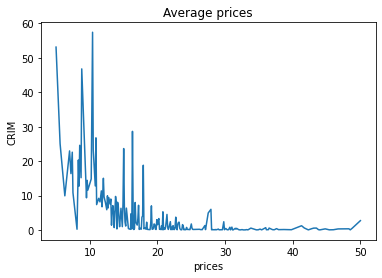

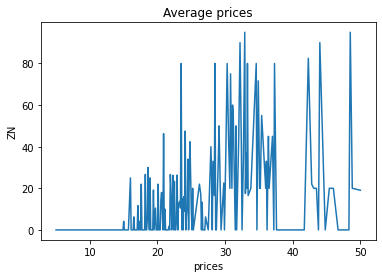

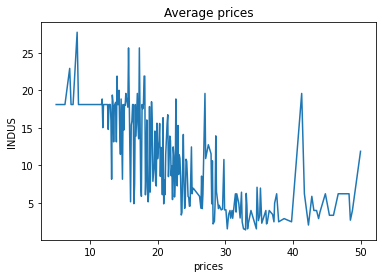

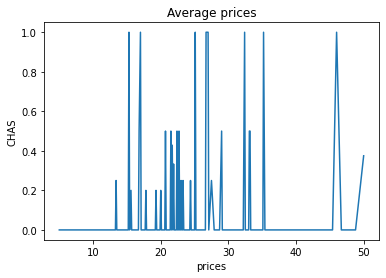

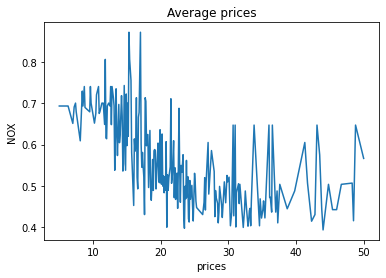

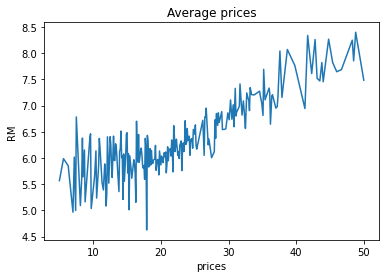

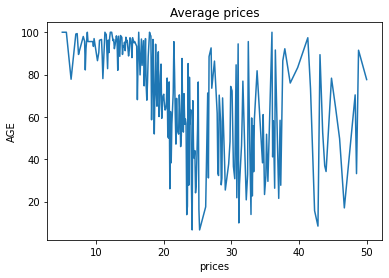

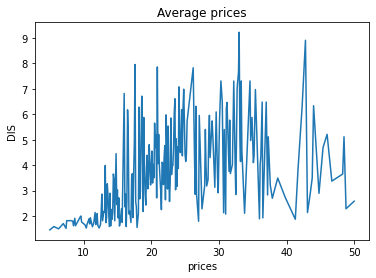

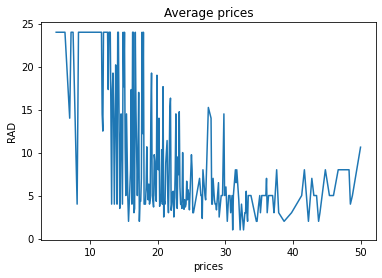

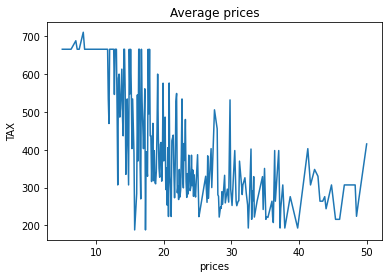

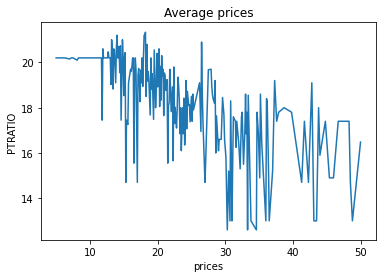

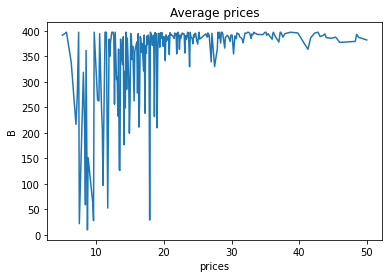

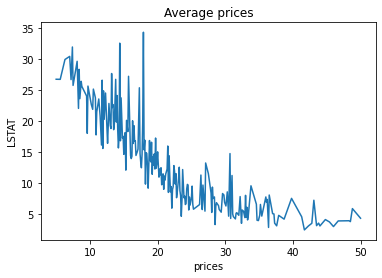

In [11]:
# Doing the same plot multiple times.
# TO AMELIORATE
# We could eve try to fit a parametric model each time
for column_name in boston_pd_sorted.drop('prices', axis=1).columns:
    fig, ax  = plt.subplots()
    boston_grouped_sorted[column_name].plot()
    plt.title('Average prices')
    plt.ylabel(column_name)
    



# Read data from files with pandas and plot with seaborn

### Machine learning, experiment monitoring

C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Ellipsis

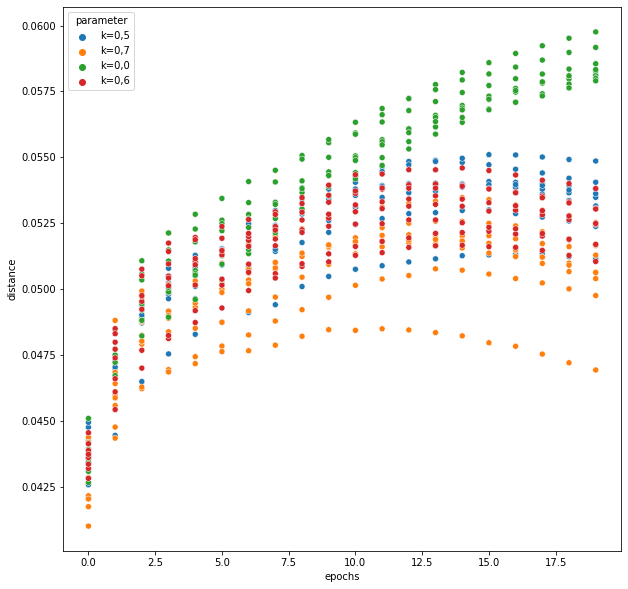

In [12]:
import pandas as pd
# read csv file with pandas
# csv file: euclidean_training.csv
data = pd.read_csv("euclidean_training.csv")
# print the resulting dataframe
...
# create the matplotlib object
fig, ax = plt.subplots(figsize=(10, 10))
# plot with sns
# plot distance = f(epochs)
sns.scatterplot(data['epochs'],data['distance'], hue = data['parameter'])
# one color = one value of parameter k
# for every value of k, multiple experiments were run 
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion
...


# Exploring the conenten of the database

In [13]:
# I will apply the same principal than before
# All values of the variable distance are different

# I first tried to do a groupby but realized that it was not the most efficient way

grouped_by_mean = data.groupby(['epochs','parameter']).mean()


In [14]:
# Creating a list of all the parameters inside the database
list_of_parameters = []
for par in set(data['parameter']):
    list_of_parameters.append(par)

C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

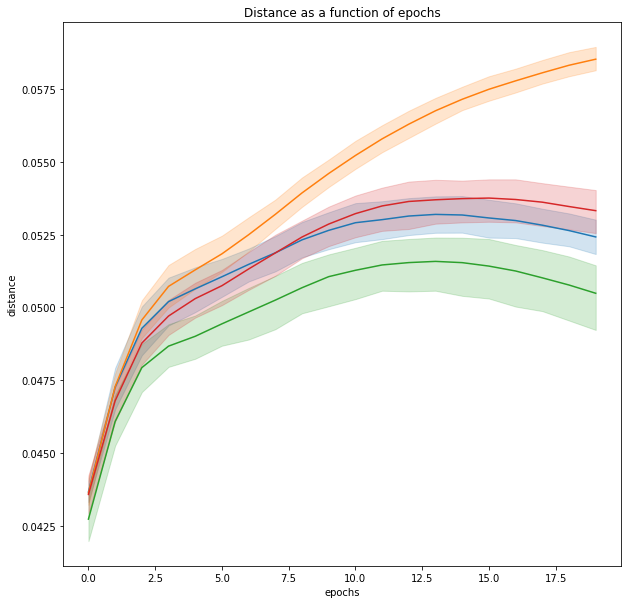

In [15]:
# Printing them all in the same graph
fig, ax = plt.subplots(figsize=(10, 10))
for par in list_of_parameters:
    
    sns.lineplot(data[data.parameter == par]['epochs'],data[data.parameter == par]['distance'], legend =  "auto")
plt.title('Distance as a function of epochs')
plt.title

C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

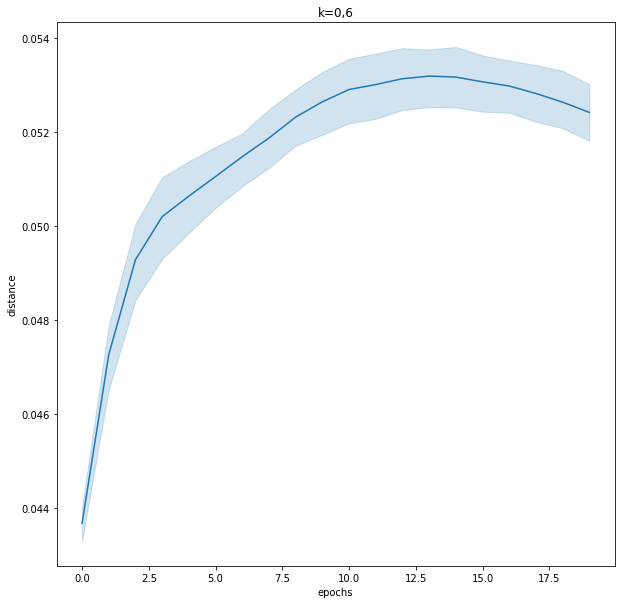

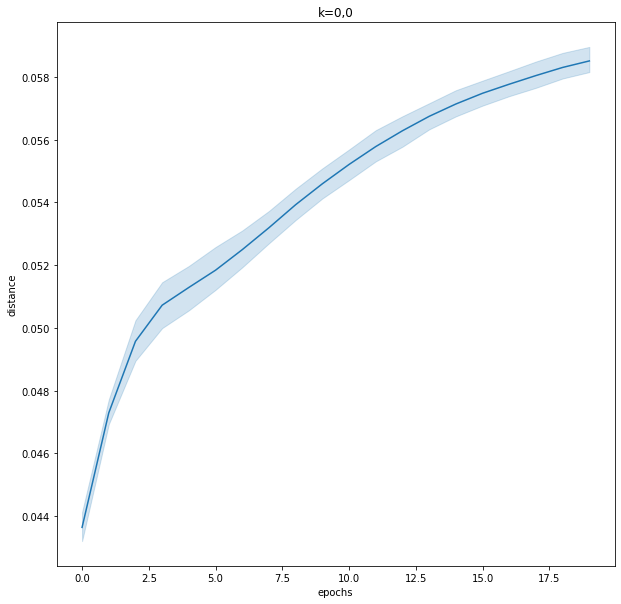

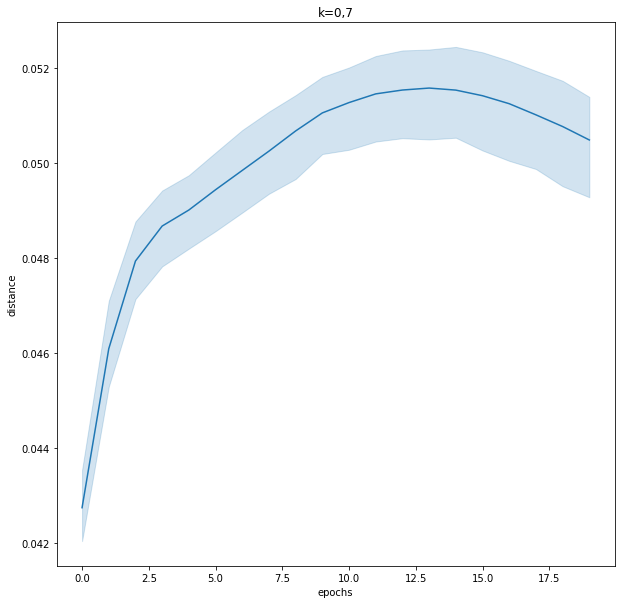

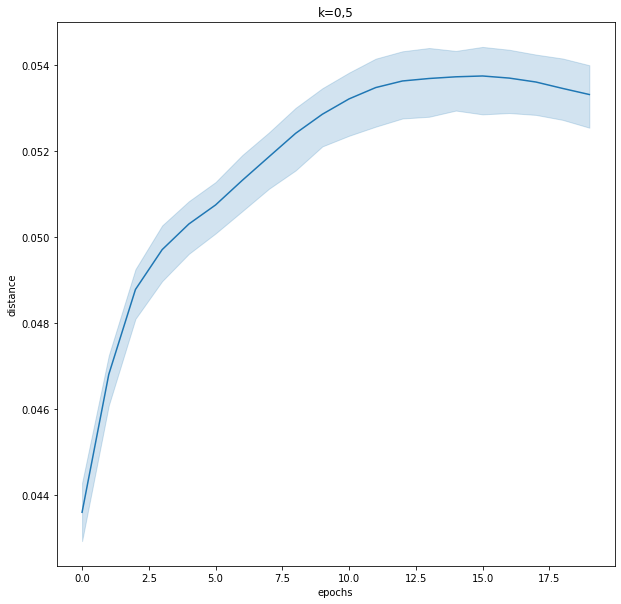

In [16]:
for par in list_of_parameters:

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(data[data.parameter == par]['epochs'],data[data.parameter == par]['distance'], legend =  "auto")
    plt.title(par)

# Plot geographical data

In [139]:
import os, ssl
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json

# The following might be unnecessary (or even produce an error...)
# Comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [140]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]
# There is something in this object that is not working
    

In [178]:
# plot an image with matplotlib
my_map = smopy.Map((45., -1., 48.9, 5.5), z = 4)
# create figure
# fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
# ax = fig.add_subplot(111)
# show image on the ax
# ax = my_map.show_ipython()

(768, 768, 3)


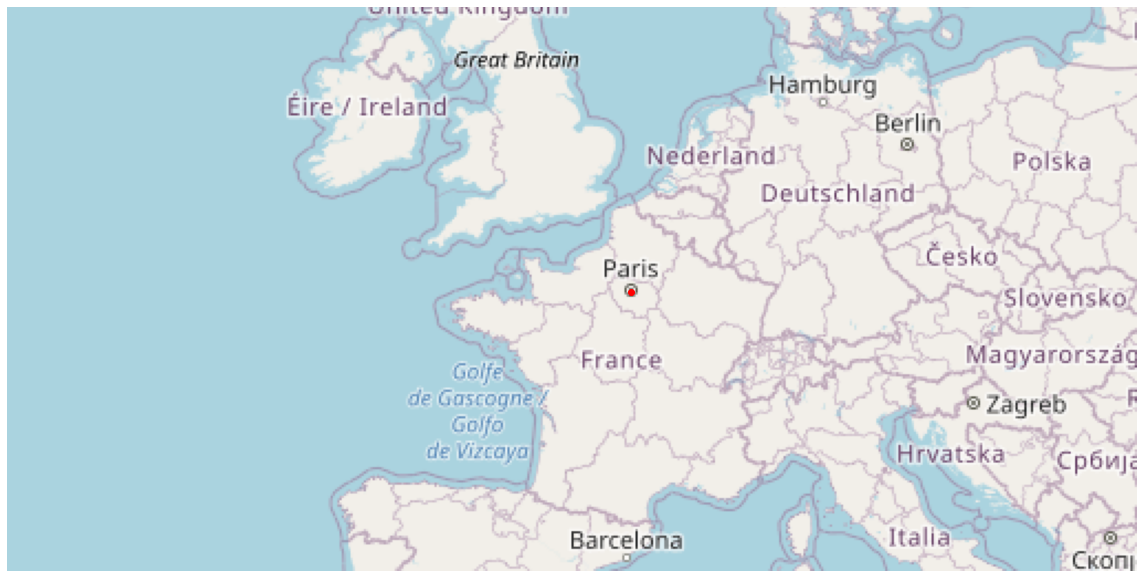

In [157]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_pixels(Paris_latitude, Paris_longitude)
# create an 'ax' on the figure
ax = my_map.show_mpl(figsize=(16, 16))
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
plt.plot(x , y , color = 'red', marker = "o")

In [32]:
# load a json file
with open("fr-esr-principaux-etablissements-enseignement-superieur.json", "r") as f:
    data = json.load(f)

# fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
# ax = fig.add_subplot(111)
# show image on the ax
# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce' labels
...
# Deserializing the json object


Ellipsis

In [75]:
# nombre d'écoles
ecole  = int(len(data))

In [86]:
data[23]

{'datasetid': 'fr-esr-principaux-etablissements-enseignement-superieur',
 'recordid': '51f86c1f1b7718008fdc2b55f9e8db988acb9c3e',
 'fields': {'localite_acheminement_uai': 'METZ',
  'uucr_id': 'UU57701',
  'aca_nom': 'Nancy-Metz',
  'type_d_etablissement': "École d'ingénieurs",
  'com_nom': 'Metz',
  'uai': '0573389Z',
  'uo_lib': "École supérieure d'ingénieurs des travaux de la construction de Metz",
  'element_wikidata': 'https://www.wikidata.org/entity/Q3578417',
  'code_postal_uai': '57070',
  'com_code': '57463',
  'numero_telephone_uai': '0387764450',
  'dep_nom': 'Moselle',
  'aca_id': 'A12',
  'sigle': 'ESITC Metz',
  'adresse_uai': '6 RUE MARCONI',
  'uucr_nom': 'Metz',
  'coordonnees': [49.10042, 6.21616],
  'url': 'http://www.esitc-metz.com/',
  'pays_etranger_acheminement': 'France',
  'reg_nom': 'Grand Est',
  'reg_id': 'R44',
  'dep_id': 'D057'},
 'geometry': {'type': 'Point', 'coordinates': [6.21616, 49.10042]},
 'record_timestamp': '2020-01-23T18:27:58.455+01:00'}

In [210]:
# We need to learn first how to deal wiht JSON objects
# creating a dataframe containing the name of the data[i]s, the coordinates, and the 
# Each elelement inside the data set is in itsel a dictionary
# Converting into data frame


x_cor = []
y_cor = []
label = []
name = []
for i in range(1,len(data)):
    try:
        # Storing the latitud
        x_cor.append(data[i]['geometry']['coordinates'][1])
        # Storing the longitud
        y_cor.append(data[i]['geometry']['coordinates'][0])
        label.append(data[i]['fields']['type_d_etablissement'])
        name.append(data[i]['fields']['uo_lib'])
    except:
        x_cor.append('NaN')
        # Storing the longitud
        y_cor.append('NaN')
        label.append('NaN')
        name.append('NaN')
    

In [211]:
schools_info = pd.DataFrame()
schools_info['x_cor'] = x_cor
schools_info['y_cor'] = y_cor 
schools_info['label'] = label 
schools_info['name'] = name 


In [212]:
label_2 = []
for label in range(0,len(schools_info['label'])):
    if 'com' in schools_info['label'][label].lower() :
        label_2.append('commerce')
    elif 'ing' in  schools_info['label'][label].lower() :
        label_2.append('ingenieur')
    elif 'ar' in  schools_info['label'][label].lower() :
        label_2.append('artistique')
    else :
       label_2.append('sans label')

In [213]:
schools_info['label_2'] = label_2

In [214]:
# There are several schools that could not be identified
schools_info.groupby(label_2).count()

,x_cor,y_cor,label,name,label_2
artistique,50,50,50,50,50
commerce,25,25,25,25,25
ingenieur,67,67,67,67,67
sans label,179,179,179,179,179


In [257]:
schools_info =  pd.DataFrame(schools_info[schools_info.x_cor != 'NaN'])

In [239]:
#for element in schools_info['x_cor']:
 #   print(element)

Text(0.5, 1.0, 'Universities in france (in green = engenering), (in blue = arts), (in red = commerce)')

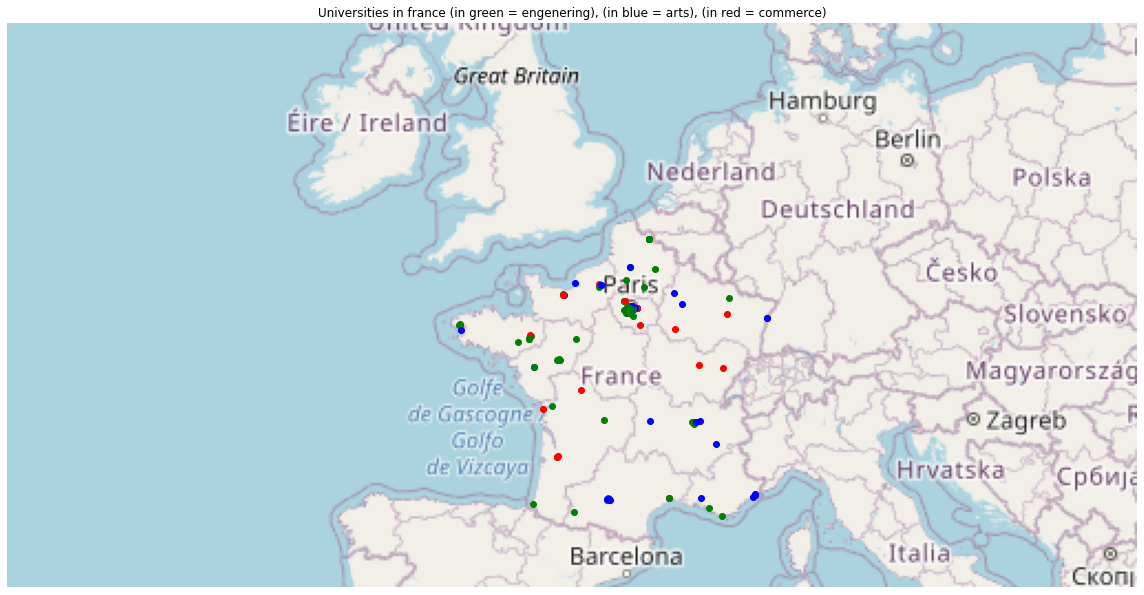

In [268]:

ax = my_map.show_mpl(figsize=(16, 16))
ax = fig.add_subplot(111)
for lon, lat, lab in zip(schools_info['x_cor'],schools_info['y_cor'],schools_info['label_2']):
    # We need to convert the coorindates into pixels
    if lab =='commerce':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'red', marker = "o")
    elif lab == 'ingenieur':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'green', marker = "o")
    elif lab == 'artistique':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'blue', marker = "o")
plt.title('Universities in france (in green = engenering), (in blue = arts), (in red = commerce)' )

# Charts

### Statistics on a user base

In [274]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
users = pd.read_csv('C:/Users/santi/OneDrive/OneDrive_07_08_2021/Camera/Documentos/Documents - Copy/France/Master 2/Big Data/Class 3/users.csv')

<AxesSubplot:xlabel='country'>

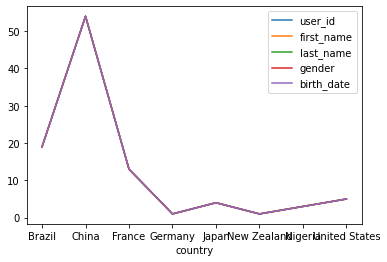

In [276]:
users.groupby('country').count().plot()

<AxesSubplot:>

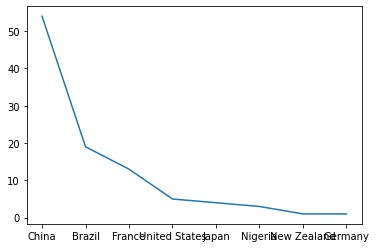

In [277]:
users['country'].value_counts().plot()

<AxesSubplot:ylabel='country'>

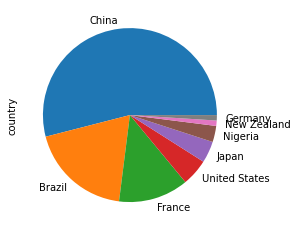

In [278]:
users['country'].value_counts().plot(kind = 'pie')

### Comparing distributions

In [279]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
...
uncertainty = pd.read_csv('C:/Users/santi/OneDrive/OneDrive_07_08_2021/Camera/Documentos/Documents - Copy/France/Master 2/Big Data/Class 3/uncertainty.csv')

In [281]:
uncertainty.head(5)

,prediction,uncertainty
0,correct,0.208022
1,correct,0.036605
2,correct,0.067507
3,correct,0.035876
4,correct,0.043756


<AxesSubplot:xlabel='uncertainty'>

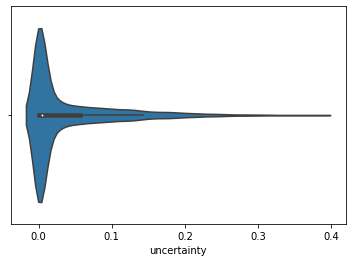

In [282]:
sns.violinplot(x = uncertainty['uncertainty'] )

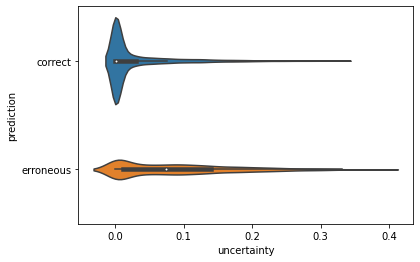

In [288]:
ax = sns.violinplot(x = uncertainty['uncertainty'], y = uncertainty['prediction'] )